# Week 05 Assignment

**Due date**: Tue, September 22 by 3:30pm (submit on Sakai)

## Comparing the genome of COVID-19 to the closely related Bat Coronavirus RaTG13

Goal:  Take some initial steps towards comparative analysis of the genomes of two coranaviruses

Background: The first paper describing the genome of the COVID-19 virus (Zhou et al. 2020) showed that the nucleotide sequence of the COVID-19 is fairly similar (96% sequence identity) to a corona virus isolated from a bat, designated  BatCoV RaTG13.  The goal of this assignment is to use Biopython and Pandas to begin the process of undertaking a comparative analysis of the genomes of these two corona viruses.

Reference: Zhou, P., Yang, X., Wang, X. et al. A pneumonia outbreak associated with a new coronavirus of probable bat origin. Nature 579, 270–273 (2020). https://doi.org/10.1038/s41586-020-2012-7


## Data

The assignment uses the following files:

* [NC_045512.gb](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/NC_045512.gb) -- the Genbank entry for the [COVID-19 reference genome](https://www.ncbi.nlm.nih.gov/nuccore/NC_045512)

* [MN996532.gb](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/MN996532.gb) -- the Genbank entry for the genome of [Bat coronavirus RaTG13](https://www.ncbi.nlm.nih.gov/nuccore/MN996532)

### Problem 1 (6 pts)

Use Biopython to parse the genbank files for each of the corona viruses.

1. How many annotated features are there for each genome?
1. How many of the annotated features are designated as coding sequences (CDS)?
1. What fraction of each genome is made up of features designated coding sequences?

In [61]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqFeature import SeqFeature
from Bio.SeqRecord import SeqRecord
import numpy as np
import pandas as pd

In [104]:
#1a
record1 = SeqIO.read("NC_045512.gb", "genbank")
record_features1 = record1.features
print(len(record_features1))

57
NC_045512.2


In [63]:
#1b
record2 = SeqIO.read("MN996532.gb", "genbank")
record_features2 = record2.features
print(len(record_features2))

21


In [64]:
#2a
record_features1_CDS = [ftr for ftr in record_features1 if ftr.type =='CDS']
print(len(record_features1_CDS))

12


In [65]:
#2b
record_features2_CDS = [ftr for ftr in record_features2 if ftr.type =='CDS']
print(len(record_features2_CDS))

10


In [66]:
#3a
sum = 0
end = 0
for i in record_features1_CDS:
    if(i == record_features1_CDS[0]):
        sum += i.location.end - i.location.start
    elif (i.location.start < end) and (i.location.end < end):
        continue
    elif(i.location.start < end):
        sum += i.location.end - end
    else:
        sum += i.location.end - i.location.start
    end = i.location.end
print(sum/len(record1.seq))

0.9784971407551082


In [67]:
#3b
sum = 0
end = 0
for i in record_features2_CDS:
    if(i == record_features2_CDS[0]):
        sum += i.location.end - i.location.start
    elif (i.location.start < end) and (i.location.end < end):
        continue
    elif(i.location.start < end):
        sum += i.location.end - end
    else:
        sum += i.location.end - i.location.start
    end = i.location.end
print(sum/len(record2.seq))

0.9755484843409814


### Problem 2 (8 pts)

Using the data from the respective genbank files create two Pandas data frames with key information about the CDS features of the two coronavirus genomes.  Your data frames should have the following columns:


1. Gene -- The first entry in the "gene" field from each `SeqFeature.qualifiers` attribute. Normalize the names to be in all capital letters.
2. Product --   The first entry in the "product" filed from each SeqFeature.qualifiers attribute
3. Start -- The start coordinate (0-indexed)
4. End -- The end coordinate (0-indexed)
5. Length -- The length of each CDS

* Once you've created these data frames, show how to save them to your file system as CSV files for later use.


In [68]:
df1 = pd.DataFrame({
    "Gene": ["".join(k.qualifiers["gene"]).upper() for k in record_features1_CDS],
    "Product": ["".join(k.qualifiers["product"]).upper() for k in record_features1_CDS],
    "Start": [k.location.start for k in record_features1_CDS],
    "End": [k.location.end for k in record_features1_CDS],
    "Length": [k.location.end - k.location.start for k in record_features1_CDS]
})
df1.to_csv('C:/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/df1.csv')
df1

,Gene,Product,Start,End,Length
0,ORF1AB,ORF1AB POLYPROTEIN,265,21555,21290
1,ORF1AB,ORF1A POLYPROTEIN,265,13483,13218
2,S,SURFACE GLYCOPROTEIN,21562,25384,3822
3,ORF3A,ORF3A PROTEIN,25392,26220,828
4,E,ENVELOPE PROTEIN,26244,26472,228
5,M,MEMBRANE GLYCOPROTEIN,26522,27191,669
6,ORF6,ORF6 PROTEIN,27201,27387,186
7,ORF7A,ORF7A PROTEIN,27393,27759,366
8,ORF7B,ORF7B,27755,27887,132
9,ORF8,ORF8 PROTEIN,27893,28259,366


In [69]:
df2 = pd.DataFrame({
    "Gene": ["".join(k.qualifiers["gene"]).upper() for k in record_features2_CDS],
    "Product": ["".join(k.qualifiers["product"]).upper() for k in record_features2_CDS],
    "Start": [k.location.start for k in record_features2_CDS],
    "End": [k.location.end for k in record_features2_CDS],
    "Length": [k.location.end - k.location.start for k in record_features2_CDS]
})
df2.to_csv('C:/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/df2.csv')
df2

,Gene,Product,Start,End,Length
0,ORF1AB,ORF1AB POLYPROTEIN,250,21537,21287
1,S,SPIKE GLYCOPROTEIN,21544,25354,3810
2,NS3,NONSTRUCTURAL PROTEIN NS3,25362,26190,828
3,E,ENVELOPE PROTEIN,26214,26442,228
4,M,MEMBRANE PROTEIN,26492,27158,666
5,NS6,NONSTRUCTURAL PROTEIN NS6,27168,27354,186
6,NS7A,NONSTRUCTURAL PROTEIN NS7A,27359,27725,366
7,NS7B,NONSTRUCTURAL PROTEIN NS7B,27721,27853,132
8,NS8,NONSTRUCTURAL PROTEIN NS8,27859,28225,366
9,N,NUCLEOCAPSID PROTEIN,28239,29499,1260


### Problem 3 (8 pts)

Using the data frames you generated in Problem 2, create a figure that graphically represent the genomes of these two coronaviruses, with the genomes depicted as gray bars and thicker red bars representing the locations of each coding sequence on these genomes.

In [70]:
from matplotlib import pyplot as plt

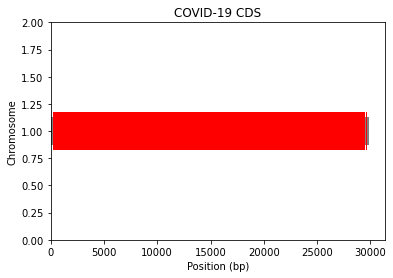

In [71]:
plt.barh(1, len(record1.seq), height=0.25, color='gray')
for (start, stop) in zip(df1.Start, df1.End):
    left = min(start, stop)
    width = abs(stop - start)
    plt.barh(1, width, left=left, color='red', height=0.35)
plt.title("COVID-19 CDS")
plt.xlabel("Position (bp)")
plt.ylabel("Chromosome")
plt.ylim(0,2)
pass

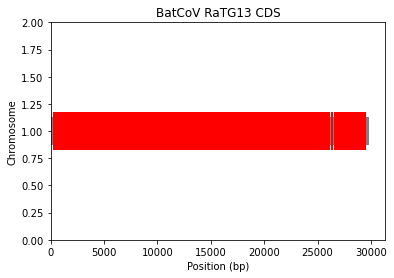

In [72]:
plt.barh(1, len(record2.seq), height=0.25, color='gray')
for (start, stop) in zip(df2.Start, df2.End):
    left = min(start, stop)
    width = abs(stop - start)
    plt.barh(1, width, left=left, color='red', height=0.35)
plt.title("BatCoV RaTG13 CDS")
plt.xlabel("Position (bp)")
plt.ylabel("Chromosome")
plt.ylim(0,2)
pass

### Problem 4 (4 pts)

What are the shared gene names between the two genomes? 


In [73]:
x = df1.Gene.unique()
x

array(['ORF1AB', 'S', 'ORF3A', 'E', 'M', 'ORF6', 'ORF7A', 'ORF7B', 'ORF8',
       'N', 'ORF10'], dtype=object)

In [74]:
y = df2.Gene.unique()
y

array(['ORF1AB', 'S', 'NS3', 'E', 'M', 'NS6', 'NS7A', 'NS7B', 'NS8', 'N'],
      dtype=object)

In [75]:
z = np.intersect1d(x,y)
z

array(['E', 'M', 'N', 'ORF1AB', 'S'], dtype=object)

### Problem 5 (12 pts)

For each of the genes that are shared between the two viruses (i.e. the CDS have the same names), create a FASTA file with the respective protein sequences for the two corona virus genomes.  

* So that the source of each sequence can be easily identified in the fasta files, when you create `SeqRecords` to hold the respective sequence information, give the records `id` values of the form `GeneName|GenbankID` ; for example, the "S" genes from Covid-19 would have the ID `S|NC_045512.2` while the same gene from the bat virus would have the ID `S|MN996532.1`

* You should end up the $n$ FASTA files where $n$ is the number of shared gene names from Problem 4.  Each of these FASTA files will contain to sequence records. Save each FASTA file to your file system, using the naming scheme: `coronaviruses_GeneName.fsa`. For example, the file for the "S" gene FASTA records would be `coronaviruses_S.fsa`.

In [146]:
list3 = []
for i in z:
    list3 += [(df1[df1.Gene == i].Start.to_numpy()[0], df1[df1.Gene == i].End.to_numpy()[0])]

    list3a = []
    list3b = []
    list_final = []

    for k in list3:
        name1 = record1.seq[k[0]:k[1]]
        name2 = record2.seq[k[0]:k[1]]
        list3a += [name1.transcribe().translate()]
        list3b += [name2.transcribe().translate()]
        name1.id = i + "|" + record1.id
        name2.id = i + "|" + record1.id
        #list_final.append(name1.transcribe().translate())
        #list_final.append(name2.transcribe().translate())

    #for j in list3a:
        #list_final.append(list3a[j])
        #list_final.append(list3b[j])

    filename = "C:/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/" + "coronavriuses_" + i + ".fsa"
    SeqIO.write(list_final, filename, "fasta")

print()
print(list3a, name, "fasta")
print()
print(list3b, name, "fasta")
print()
print(list_final, name, "fasta")


[Seq('MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKP...LV*', HasStopCodon(ExtendedIUPACProtein(), '*')), Seq('MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFL...VQ*', HasStopCodon(ExtendedIUPACProtein(), '*')), Seq('MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNTASWFT...QA*', HasStopCodon(ExtendedIUPACProtein(), '*')), Seq('MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLV...LTT', HasStopCodon(ExtendedIUPACProtein(), '*')), Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...YT*', HasStopCodon(ExtendedIUPACProtein(), '*'))] ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCAC